# Mission 2. Abengers, Assemble!

## Core Mission
- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
stat_df = pd.read_csv("./charcters_stats.csv")

stat_df

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


### 능력치수치의 합이 가장 큰 캐릭터
- 능력치 Alignment, Intelligence, Strength, Speed, Durability, Power, Combat들의 합인 Total이 이미 존재
    - Total이 가장 큰 캐릭터를 찾으면 됨

In [11]:
stat_df[stat_df['Total'] == stat_df['Total'].max() ]['Name']
# 마션 맨헌터 - DC 코믹스

361    Martian Manhunter
Name: Name, dtype: object

In [76]:
stat_df[stat_df['Total'] == stat_df['Total'].max() ]['Total']

361    581
Name: Total, dtype: int64

### Good / Bad (Alignment) 캐릭터의 능력치 수치 분포
- 능력치의 수치만 보았을 때는 Bad 캐릭터가 Good 캐릭터 보다 능력치가 높은 경우가 많았음.
    - **~(그래서 맨날 Good 캐릭터가 힘을 합쳐야 Bad 캐릭터를 이길 수 있나보다)~**

In [158]:
#stat_df['Alignment'].count() 
# Alignment의 개수를 확인 했을때 전체 값과 맞지 않음 = NA 값이 존재함

# 결측치 존재 여부 확인
stat_df.isnull().sum()
# Alignment에 3개의 결측치가 존재

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

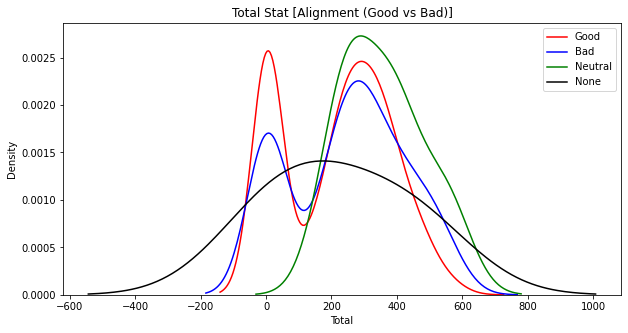

In [62]:
#  종합적인 캐릭터 능력치를  Alignment (Good, Bad, Neutral, None)를 기준으로 분류
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(stat_df.loc[(stat_df['Alignment'] == 'good'), 'Total'], ax=ax, color = 'r') # good = red
sns.kdeplot(stat_df.loc[(stat_df['Alignment'] == 'bad'), 'Total'], ax=ax, color = 'b') # bad = blue
sns.kdeplot(stat_df.loc[(stat_df['Alignment'] == 'neutral'), 'Total'], ax=ax, color = 'g') # neutral = green
sns.kdeplot(stat_df.loc[(stat_df['Alignment'].isnull()), 'Total'], ax=ax, color = 'black') # none = black

plt.title("Total Stat [Alignment (Good vs Bad)]")
 
plt.legend(['Good', 'Bad', 'Neutral', 'None'])
    
plt.show()

#### Good / Bad / Neutral 을 비교해 보았을 때
- **평균을 따졌을 때 Good 캐릭터 보다는 Bad 캐릭터의 능력치가 더 높음을 알 수 있다.**
- Neutral 캐릭터가 가장 평균이 높았다.
    - ~(역시 중립이 가장 쎄다.)~

In [63]:
stat_df[(stat_df['Alignment'] == 'good')]['Total'].mean()

214.99074074074073

In [64]:
stat_df[(stat_df['Alignment'] == 'bad')]['Total'].mean()

247.21212121212122

In [65]:
stat_df[(stat_df['Alignment'] == 'neutral')]['Total'].mean()

355.3636363636364

<AxesSubplot:xlabel='Alignment', ylabel='Total'>

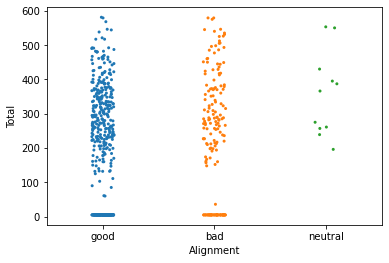

In [53]:
sns.stripplot(x='Alignment', y='Total', data= stat_df, size = 3)

---

# Mission 2. Abengers, Assemble!

## Extra Mission
- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
    - **이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.**
    - 이 과제는 핵심 임무 이후에 진행되어야 한다.

### l. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가?

#### 위에서 사용한 charcters_stats.csv 만을 보았을 때는 각 캐릭터가 어느 코믹스 회사를 바탕으로 하고 있는지 알 수 없다.
- #### 주어진 csv 파일들 중 marvel_characters_info.csv에 코믹스 회사별 캐릭터 데이터가 주어짐
    - 두 dataframe을 merge하여 코믹스 별 캐릭터의 스테이터스를 나타낼 수 있음

- (Merge된 dataframe)을 코믹스 회사를 기준으로 `.groupby()` 하여 `Total`의 합을 계산 해준다.
- Sort 해보면 Marvel Comics 가 압도적 1등, 그 뒤을 이어 DC Comics가 2등 .... 임을 알 수 있다.

In [220]:
char_df = pd.read_csv("./marvel_characters_info.csv")

char_df

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


In [221]:
pub_df = char_df[(['Name', 'Publisher'])]

pub_df

,Name,Publisher
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Abraxas,Marvel Comics
...,...,...
729,Yellowjacket II,Marvel Comics
730,Ymir,Marvel Comics
731,Yoda,George Lucas
732,Zatanna,DC Comics


In [222]:
stat_total_df = stat_df[(['Name', 'Alignment', 'Total'])]
stat_total_df

,Name,Alignment,Total
0,3-D Man,good,233
1,A-Bomb,good,316
2,Abe Sapien,good,299
3,Abin Sur,good,406
4,Abomination,bad,436
...,...,...,...
606,Yellowjacket,good,164
607,Yellowjacket II,good,182
608,Ymir,good,388
609,Zatanna,good,292


In [223]:
# 두 dataframe에서 중복되는 Name을 기준으로 merge 한 결과
## 기존 status 가 나타나 있는 dataframe을 기준으로 publisher dataframe과 Name 데이터가 완전히 겹치지 않아 손실 발생
comic_df = pd.merge(stat_total_df, pub_df)
comic_df

,Name,Alignment,Total,Publisher
0,A-Bomb,good,316,Marvel Comics
1,Abe Sapien,good,299,Dark Horse Comics
2,Abin Sur,good,406,DC Comics
3,Abomination,bad,436,Marvel Comics
4,Abraxas,bad,526,Marvel Comics
...,...,...,...,...
595,Yellowjacket,good,164,Marvel Comics
596,Yellowjacket II,good,182,Marvel Comics
597,Ymir,good,388,Marvel Comics
598,Zatanna,good,292,DC Comics


In [224]:
# 결측치 확인
comic_df.isnull().sum()
# Alignment에 3개, Publisher에 7개의 결측치가 존재
# 결측치가 존재 하지만 대세에 영향을 주지 않으므로 무시하도록 한다.

Name         0
Alignment    3
Total        0
Publisher    7
dtype: int64

In [225]:
comic_df['Total'].groupby(by = comic_df['Publisher']).sum().sort_values(ascending = False)

Publisher
Marvel Comics        85104
DC Comics            43591
NBC - Heroes          2670
Dark Horse Comics     1575
Shueisha               963
SyFy                   944
Image Comics           918
ABC Studios            664
Icon Comics            592
Microsoft              425
Sony Pictures          398
Universal Studios      237
HarperCollins           30
Team Epic TV            25
Wildstorm               10
Hanna-Barbera            5
Name: Total, dtype: int64

### ll. 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 
- 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 
- 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 
- 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.

#### 주의 사항
- 중립 캐릭터가 영향력을 미치게 된다.
- Alignment가 결측치인 경우를 어떻게 처리해야하는가 
    - **Alignment가 결측치인 경우 중립캐릭터로 보는걸로 하자!**

In [233]:
na = stat_total_df['Alignment'].fillna('neutral')

In [234]:
# 결측치 처리를 안한 상태의 Alignment - 수
stat_total_df['Total'].groupby(by = stat_total_df['Alignment']).count()

Alignment
bad        165
good       432
neutral     11
Name: Total, dtype: int64

In [235]:
# 결측치 처리를 안한 상태의 Alignment 의 Total 합산
stat_total_df['Total'].groupby(by = stat_total_df['Alignment']).sum()

Alignment
bad        40790
good       92876
neutral     3909
Name: Total, dtype: int64

In [236]:
# 결측치를 neutral로 바꿔준 상태의 Alignment 의 수
stat_total_df['Total'].groupby(by = na).count()

Alignment
bad        165
good       432
neutral     14
Name: Total, dtype: int64

In [237]:
# 캐릭터 능력치의 총 합만 따져봤을때는 Good 캐릭터 수가 432 Bad 캐릭터 수가 165로 수 싸움에 밀려 총합이 Good이 더 크다.
# 이러니 Good Vs Bad로 싸우면 수 싸움이든 어쨋든 정의는 승리한다.
stat_total_df['Total'].groupby(by = na).sum()

Alignment
bad        40790
good       92876
neutral     4573
Name: Total, dtype: int64

In [238]:
# 그러나 우리가 필요한 데이터는 평균 데이터이므로 평균을 내주면 Bad 캐릭터가 Good 캐릭터 보다 쎄다는 것을 알 수 있다.
# 역시 악당이 강하다. 그래야 싸울 맛이 나지....
# 그래야 힘을 합쳐 싸우지....
stat_total_df['Total'].groupby(by = na).mean()

Alignment
bad        247.212121
good       214.990741
neutral    326.642857
Name: Total, dtype: float64

In [239]:
# 위의 이유에서 중립(neutral)은 Good의 편에 서게 된다.
# 위의 값을 보면 계산 해보지 않아도 택도 없음을 알 수 있지만 일단 계산 해보자

stat_ali = stat_total_df['Total'].groupby(by = na).sum()
count_ali = stat_total_df['Total'].groupby(by = na).count()
new_good = (stat_ali.good+ stat_ali.neutral) / (count_ali.good+ count_ali.neutral)
new_good
# 역시 택도 없다. 선은 힘을 합치지 않으면 악을 이길 수 없다.

218.49551569506727

### 결론
#### 선은 악을 1vs1로 이기는게 아니라 Assemble!!! 해서 힘을 합쳐 악에 맞서 싸운다.
- 그렇지 않으면 재미없어서 못볼듯.....
- 하지만 선은 언제나 승리한다.

### lll. 그렇다면 DC vs Marvel 을 생각해보자
#### 단순하게 비교하는 것은 재미가 없다.
- #### DC 악당 vs Marvel 히어로
- #### Marvel 악당 vs DC 히어로
를 한다면 결과는 어떻게 될까.... 그래도 세계는 평화로울까?

#### comic_df = pd.merge(stat_total_df, pub_df)를 그대로 이용하자

In [263]:
# comic_df = pd.merge(stat_total_df, pub_df)
# sns.kdeplot(exame_df.loc[exame_df["parental level of education"] == "some high school"]['total score'], ax=ax)
DC_good = comic_df['Total'][comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'good'].mean()
DC_good

232.07563025210084

In [264]:
DC_bad = comic_df['Total'][comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'bad'].mean()
DC_bad

306.5217391304348

In [265]:
Marvel_good = comic_df['Total'][comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'good'].mean()
Marvel_good

233.172131147541

In [266]:
Marvel_bad = comic_df['Total'][comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'bad'].mean()
Marvel_bad

260.31632653061223

### Marvel 히어로가 DC 히어로 보다 강한데..... DC 악당이 Marvel악당에 비해 너무 강하다....
- #### 세계관이 다르다보니 차이가 나나보다....

### ~그러면 DC 히어로는 Marvel히어로 보다 평균적으로 약한데 대체 어떻게 더쎈 악당들을 이기는거지... 그 S 가 넘사인가..~

<ipython-input-270-16be03db766d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'good']['Total'], ax=ax)
<ipython-input-270-16be03db766d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'bad']['Total'], ax=ax)
<ipython-input-270-16be03db766d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'good']['Total'], ax=ax)
<ipython-input-270-16be03db766d>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'bad']['Total'], ax=ax)


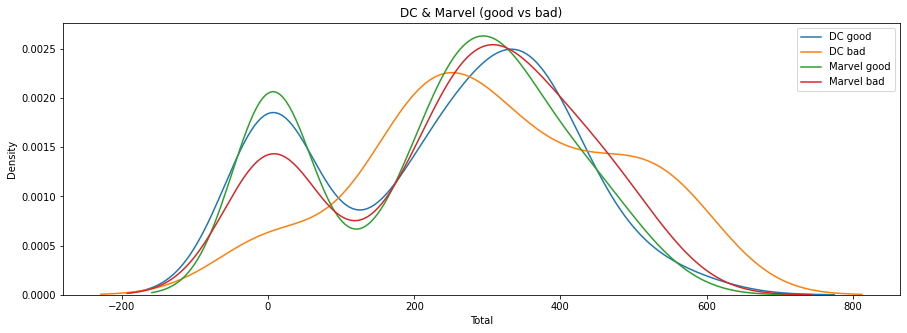

In [270]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'good']['Total'], ax=ax)
sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'bad']['Total'], ax=ax)
sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'good']['Total'], ax=ax)
sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'bad']['Total'], ax=ax)

plt.title("DC & Marvel (good vs bad)")   

plt.legend(['DC good', 'DC bad', 'Marvel good', 'Marvel bad'])
plt.show()

<ipython-input-273-78baf61491fa>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'good']['Total'], ax=ax)
<ipython-input-273-78baf61491fa>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'bad']['Total'], ax=ax)


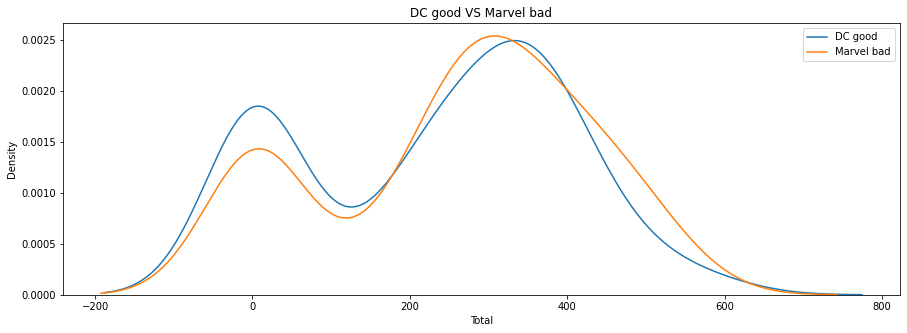

In [273]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'good']['Total'], ax=ax)
sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'bad']['Total'], ax=ax)

plt.title("DC good VS Marvel bad")   

plt.legend(['DC good', 'Marvel bad'])
plt.show()

<ipython-input-274-b455dbf58456>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'bad']['Total'], ax=ax)
<ipython-input-274-b455dbf58456>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'good']['Total'], ax=ax)


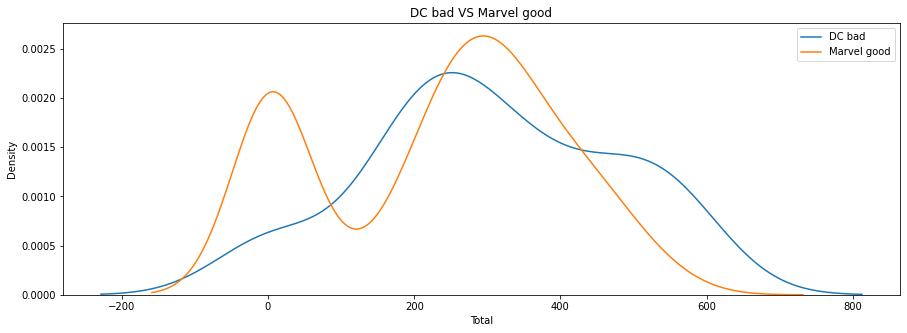

In [274]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'DC Comics'][comic_df['Alignment'] == 'bad']['Total'], ax=ax)
sns.kdeplot(comic_df.loc[comic_df['Publisher'] == 'Marvel Comics'][comic_df['Alignment'] == 'good']['Total'], ax=ax)

plt.title("DC bad VS Marvel good")   

plt.legend(['DC bad', 'Marvel good'])
plt.show()

### 마지막으로 lV. 여러가지 종족 중 어느 종족이 가장 강할까?

In [276]:
# stat_total_df = stat_df[(['Name', 'Alignment', 'Total'])]
race_df = char_df[(['Name', 'Race'])]
race_df

,Name,Race
0,A-Bomb,Human
1,Abe Sapien,Icthyo Sapien
2,Abin Sur,Ungaran
3,Abomination,Human / Radiation
4,Abraxas,Cosmic Entity
...,...,...
729,Yellowjacket II,Human
730,Ymir,Frost Giant
731,Yoda,Yoda's species
732,Zatanna,Human


In [277]:
race_stat_df = pd.merge(stat_total_df, race_df)
race_stat_df

,Name,Alignment,Total,Race
0,A-Bomb,good,316,Human
1,Abe Sapien,good,299,Icthyo Sapien
2,Abin Sur,good,406,Ungaran
3,Abomination,bad,436,Human / Radiation
4,Abraxas,bad,526,Cosmic Entity
...,...,...,...,...
595,Yellowjacket,good,164,Human
596,Yellowjacket II,good,182,Human
597,Ymir,good,388,Frost Giant
598,Zatanna,good,292,Human


In [319]:
race_stat_df['Total'].groupby(by = race_stat_df['Race']).mean().sort_values(ascending = False)

Race
Martian              581.000000
Bizarro              550.000000
Cosmic Entity        539.500000
Kryptonian           528.142857
Saiyan               521.000000
Czarnian             486.000000
Human-Kree           480.000000
Eternal              471.500000
Human / Cosmic       453.333333
Android              448.500000
Bolovaxian           446.000000
New God              440.500000
Asgardian            429.750000
Korugaran            428.000000
Flora Colossus       419.000000
Demi-God             415.000000
Ungaran              406.000000
Alien                402.200000
Kakarantharaian      392.000000
Frost Giant          380.500000
Tamaranean           377.000000
Symbiote             371.142857
Neyaphem             370.000000
Human-Vuldarian      370.000000
Demon                354.200000
Mutant / Clone       336.000000
Inhuman              335.000000
Clone                329.000000
Zombie               323.000000
Cyborg               309.250000
Human / Radiation    304.181818
Mut

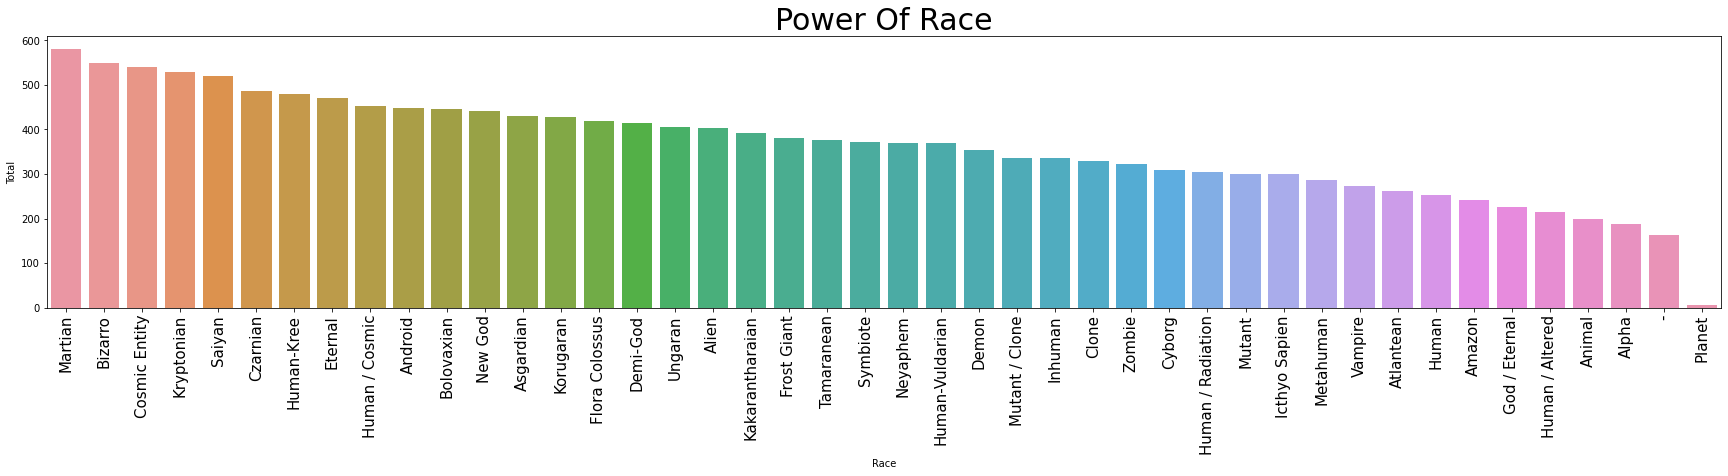

In [371]:
fig, ax = plt.subplots(1, 1, figsize=(30,5))
# race_stat_df['Total'].groupby(by = race_stat_df['Race']).mean().to_frame().sort_values(by = 'Total', ascending = False)
sorted_df = race_stat_df.groupby(['Race'])['Total'].mean().to_frame().sort_values(by = 'Total', ascending = False)
sns.barplot(x = sorted_df.index, y= 'Total', data = sorted_df)

plt.xlabel('Race')
plt.xticks(fontsize=15, rotation=90) # when X tick labels are long
plt.title("Power Of Race", fontsize = 30)

plt.show()